In [701]:
#import thinkplot
#import thinkstats2
import pandas as pd
import numpy as np
import math
import scipy.stats 
import thinkplot
import thinkstats2

##Seaborn for fancy plots. 
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (15,5)
sns.set(style="darkgrid", font_scale=1.2)

from cmath import nan

In [702]:
#chapter-10

<h1>Assignment 2: Life Expectancy and You!</h1>

<b>Instructions:</b>
<ul>
<li>Use the worksheet below to act as a guide to exploring and examining the data in the dataset.
<li>Try to make things easy to read. Look at the formatting stuff above. 
<li>As long as you do what is asked, you can do things in many different ways. You may need to do a little searching. 
</ul>

### Please Use Formatting to Make it Clear What I Should be Looking at! Please!!! I Beg You!!!

In [703]:
#Load data and do some cleanup before starting
#Please don't change this stuff. 
dfLE = pd.read_csv("led.csv")
dfLE.rename(columns={"Status":"isDeveloped", }, inplace=True)
dfLE["isDeveloped"].replace(('Developed', 'Developing'), (1, 0.0), inplace=True)
dfLE = dfLE.drop(columns={"Year", "Incomecompositionofresources", "thinness5-9years", "HIV/AIDS", "percentageexpenditure", "Totalexpenditure", "thinness1-19years"})
dfLE = dfLE.groupby("Country", as_index=False).mean()
#dfLE=dfLE[~np.isnan(dfLE)]
dfLE.head()


,Country,isDeveloped,Lifeexpectancy,AdultMortality,infantdeaths,Alcohol,HepatitisB,Measles,BMI,under-fivedeaths,Polio,Diphtheria,GDP,Population,Schooling
0,Afghanistan,0.0,58.19375,269.0625,78.2500,0.014375,64.562500,2362.2500,15.51875,107.5625,48.3750,52.3125,340.015425,9.972260e+06,8.21250
1,Albania,0.0,75.15625,45.0625,0.6875,4.848750,98.000000,53.3750,49.06875,0.9375,98.1250,98.0625,2119.726679,6.969116e+05,12.13750
2,Algeria,0.0,73.61875,108.1875,20.3125,0.406667,78.000000,1943.8750,48.74375,23.5000,91.7500,91.8750,2847.853392,2.164983e+07,12.71250
3,Angola,0.0,49.01875,328.5625,83.7500,5.740667,70.222222,3561.3125,18.01875,132.6250,46.1250,47.6875,1975.143045,1.014710e+07,8.04375
4,AntiguaandBarbuda,0.0,75.05625,127.5000,0.0000,7.949333,98.266667,0.0000,38.42500,0.0000,96.9375,98.3125,9759.305728,NaN,8.84375


In [704]:
#sns.histplot(dfLE)

<h2>Part 1: Add a column for GDP per Capita (5pts)</h2>

Show print the labels along with just that column. Print 10 random rows of that data. 

Note: you'll have to look at the units to ensure you get it right. 

In [705]:
# add a column for GDP per Capita
dfLE['GDP_per_Capita'] = (dfLE['GDP'] / dfLE['Population'])
dfLE["GDP_per_Capita"] = round(dfLE["GDP_per_Capita"]*1000000, 0)

In [706]:
dfLE.describe()

,isDeveloped,Lifeexpectancy,AdultMortality,infantdeaths,Alcohol,HepatitisB,Measles,BMI,under-fivedeaths,Polio,Diphtheria,GDP,Population,Schooling,GDP_per_Capita
count,191.000000,183.000000,183.000000,191.000000,189.000000,182.000000,191.000000,187.000000,191.000000,191.000000,191.000000,161.000000,1.440000e+02,178.000000,1.440000e+02
mean,0.167539,69.224932,164.796448,29.133835,4.486793,79.287713,2326.165576,39.117146,40.412631,82.832863,82.628740,7268.713018,1.265734e+07,12.027739,6.974010e+04
std,0.374438,9.186432,96.185159,113.691604,3.873123,17.417697,7924.050116,17.175529,154.310693,15.925330,16.433269,10743.153637,3.827961e+07,3.104852,5.613661e+05
min,0.000000,46.112500,18.750000,0.000000,0.010000,9.000000,0.000000,5.200000,0.000000,29.812500,26.812500,136.183210,2.920000e+02,1.531250,2.000000e+00
25%,0.000000,62.475000,80.406250,0.000000,1.000000,68.150000,4.781250,20.887500,0.000000,72.000000,72.375000,794.523010,9.623203e+05,9.971875,1.127500e+02
50%,0.000000,72.487500,146.562500,2.625000,3.582667,83.376068,138.937500,43.843750,3.250000,88.187500,88.500000,2847.853392,3.665163e+06,12.359375,7.445000e+02
75%,0.000000,75.106250,219.593750,21.062500,7.466000,94.687500,1501.593750,52.275000,25.281250,96.062500,96.031250,7741.748090,1.034789e+07,14.093750,6.091250e+03
max,1.000000,82.537500,550.062500,1366.687500,13.497333,99.000000,65857.937500,87.300000,1812.500000,99.000000,99.000000,57362.874601,4.214677e+08,20.037500,6.616857e+06


In [707]:
#dfLE=dfLE[~np.isnan(dfLE)]
dfLE=dfLE.dropna()

In [792]:
dfLE

,Country,isDeveloped,Lifeexpectancy,AdultMortality,infantdeaths,Alcohol,HepatitisB,Measles,BMI,under-fivedeaths,Polio,Diphtheria,GDP,Population,Schooling,GDP_per_Capita
0,Afghanistan,0.0,58.19375,269.0625,78.2500,0.014375,64.562500,2362.2500,15.51875,107.5625,48.3750,52.3125,340.015425,9.972260e+06,8.21250,34.0
1,Albania,0.0,75.15625,45.0625,0.6875,4.848750,98.000000,53.3750,49.06875,0.9375,98.1250,98.0625,2119.726679,6.969116e+05,12.13750,3042.0
2,Algeria,0.0,73.61875,108.1875,20.3125,0.406667,78.000000,1943.8750,48.74375,23.5000,91.7500,91.8750,2847.853392,2.164983e+07,12.71250,132.0
3,Angola,0.0,49.01875,328.5625,83.7500,5.740667,70.222222,3561.3125,18.01875,132.6250,46.1250,47.6875,1975.143045,1.014710e+07,8.04375,195.0
5,Argentina,0.0,75.15625,106.0000,10.1250,7.966667,81.285714,2.0000,54.98125,11.3750,93.3750,92.3750,6998.575103,2.012120e+07,16.50625,348.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183,Uruguay,0.0,76.07500,119.9375,0.5625,6.172667,94.312500,0.0000,52.92500,0.7500,94.2500,89.1250,7192.584875,2.396771e+06,15.23125,3001.0
184,Uzbekistan,0.0,68.03125,184.8125,21.9375,1.608667,95.642857,208.4375,34.80625,25.6875,98.5625,98.4375,651.092359,9.036317e+05,11.64375,721.0
185,Vanuatu,0.0,71.38750,137.8750,0.0000,0.806667,56.125000,20.8750,44.25625,0.0000,66.1875,59.0625,2000.245518,1.230962e+05,10.56875,16249.0
189,Zambia,0.0,53.90625,354.3125,33.4375,2.239333,69.818182,6563.8125,17.45000,52.3750,64.3750,74.2500,811.811841,6.260246e+06,11.21250,130.0


In [708]:
# Print 10 random rows of GDP per Capita
dfLE['GDP_per_Capita'].head(10)

0       34.0
1     3042.0
2      132.0
3      195.0
5      348.0
6     1970.0
7     7551.0
8     5224.0
9     1531.0
12      10.0
Name: GDP_per_Capita, dtype: float64

In [709]:
#removing NAN's from the GDP per Capita Data
df_p=dfLE["GDP_per_Capita"]
df_p=df_p[~np.isnan(df_p)]
df_p.head()


0      34.0
1    3042.0
2     132.0
3     195.0
5     348.0
Name: GDP_per_Capita, dtype: float64

<AxesSubplot:xlabel='GDP_per_Capita', ylabel='Count'>

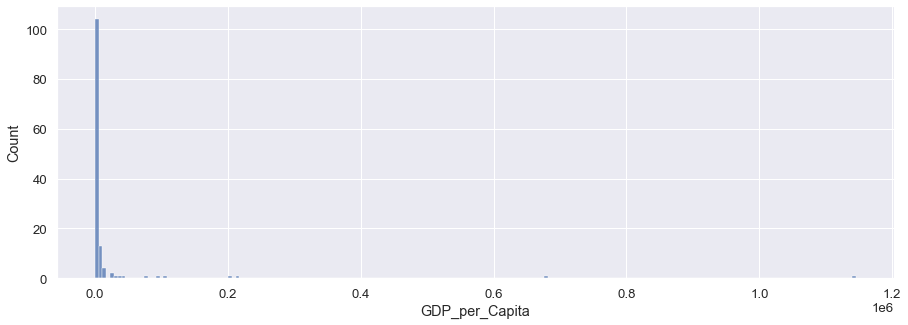

In [710]:
#Plottng histogram for GDP per Capita Data
sns.histplot(df_p, bins=200)

### Part 2: Print a visualization of each distribution. Both regular (density) and cumulative. (15pts)

Print each distribution is some type of visualization, also print the cumulative distribution. 
<ul>
<li>5 points are for using some visualization that is effective.
<li>5 points for formatting things in a nice layout. Hint: for whatever chart you use, look into some formatting options. Think of what to try to Google for an example for printing multiple charts, a grid of charts, etc... and try to adapt one to yours. There is also a way to do it using some thinkstats/thinkplot stuff. 
<li><b>5 points are for doing it in an efficient way - just listing off each column is lots of typing... Remember, the #1 trait of programmers is laziness with respect to repetitive tasks. If we are doing the same thing over and over with tiny changes, try to think of a condensed way to do this...</b>
</ul>

In [711]:
#Graph
#hist2 = thinkstats2.Hist(round(dfEL))
hist2 = thinkstats2.Hist(df_p)
pmf2 = thinkstats2.Pmf(df_p)
cdf2 = thinkstats2.Cdf(df_p)

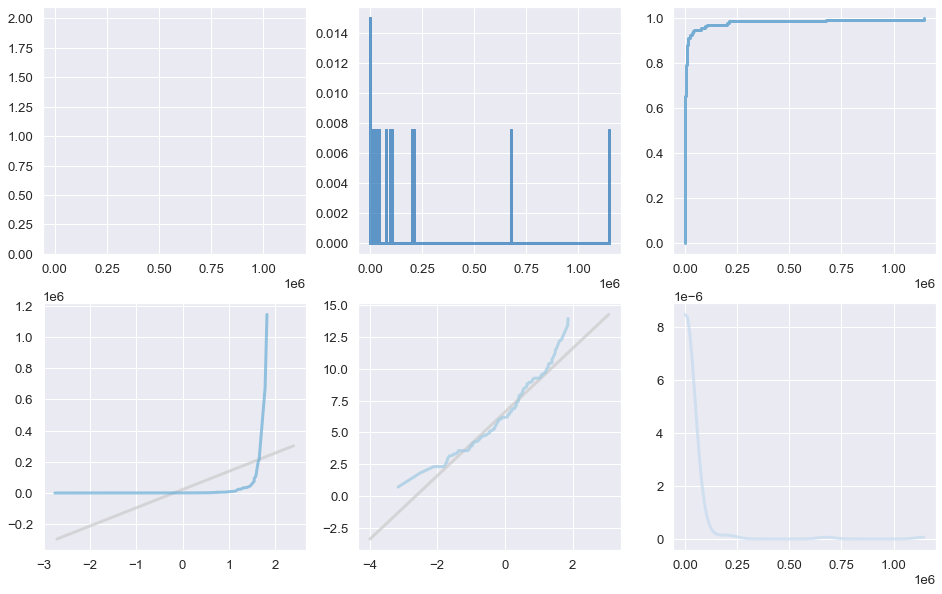

In [712]:
#Print all distributions
#Create graphs
thinkplot.PrePlot(6, rows =2, cols=3)
thinkplot.Hist(hist2)
thinkplot.SubPlot(2)
thinkplot.Pmf(pmf2)
thinkplot.SubPlot(3)
thinkplot.Cdf(cdf2)
thinkplot.SubPlot(4)
thinkstats2.NormalProbabilityPlot(df_p)
thinkplot.SubPlot(5)
thinkstats2.NormalProbabilityPlot(np.log(df_p))
thinkplot.SubPlot(6)
pdf = thinkstats2.EstimatedPdf(df_p) #See more below
thinkplot.Pdf(pdf)
thinkplot.Config()

### Create an analytical distribution for SCHOOLING, and use it for a couple of things. (20pts)

<ul>
<li>5 points are for choosing an appropriate distribution. Please state it clearly somewhere.
<li>10 points are for creating and visualizing the distribution. Do it <b>without</b> using a fit() method. Plot the emperical data on the same graph as the analytical distribution. 
<li>5 points are for using the distribution to predict the percentage of that have a schooling level within 1 year of Canada. 
</ul>

In [713]:
#Analytical for Schooling
dfs=dfLE["Schooling"]
dfs=dfs[~np.isnan(dfs)]

In [714]:
dfs.info()

<class 'pandas.core.series.Series'>
Int64Index: 133 entries, 0 to 190
Series name: Schooling
Non-Null Count  Dtype  
--------------  -----  
133 non-null    float64
dtypes: float64(1)
memory usage: 2.1 KB


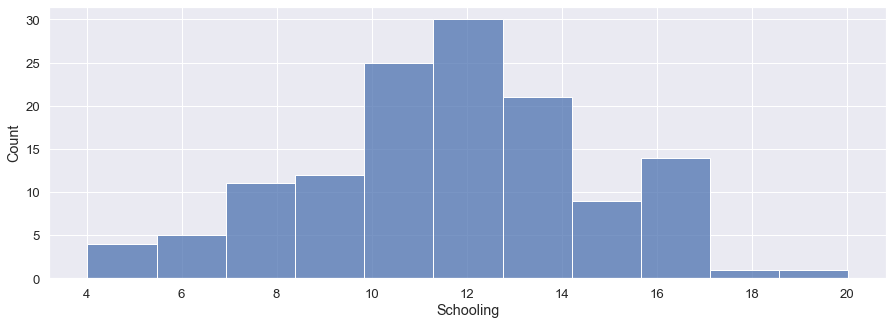

In [715]:
#Empirical distribution
sns.histplot(dfs)
sns.set(style="darkgrid", font_scale=1.2)

c:\Users\shikh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


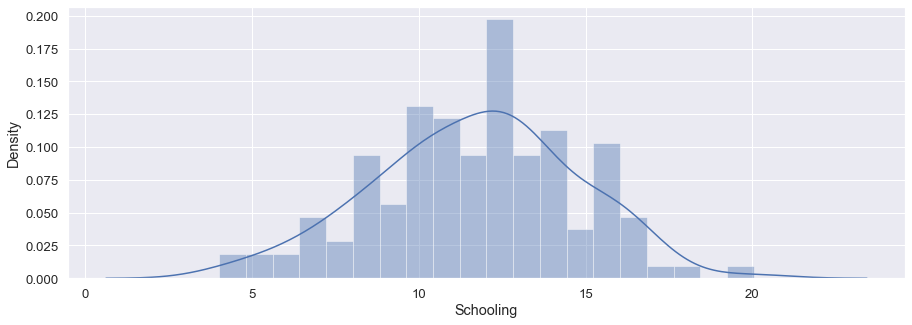

In [716]:
#Empirical distribution

sns.distplot(dfs,bins=20)
sns.set(style="darkgrid", font_scale=1.2)

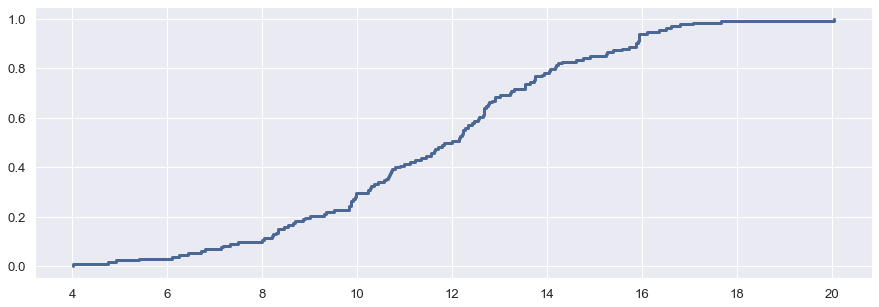

In [717]:
#Make an emperical CDF
cdf_es = thinkstats2.Cdf(dfs)
thinkplot.Cdf(cdf_es)
sns.set(style="darkgrid", font_scale=1.2)

In [718]:
# Empirical distribution provides a near bell shape curve, therefore possibility that its a normal distribution

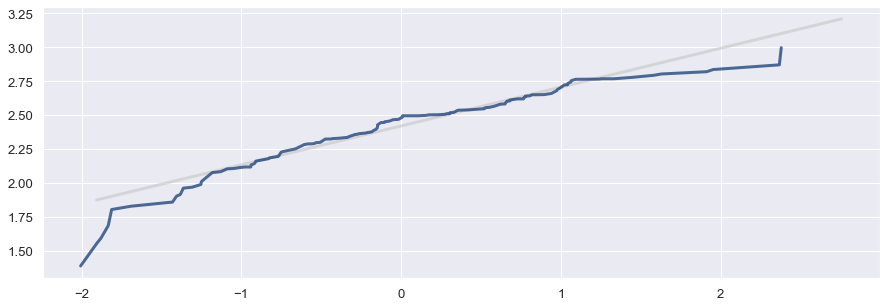

In [719]:
# Analytical distribution
# Normal Probability plot

thinkstats2.NormalProbabilityPlot(np.log(dfs))

In [720]:
dfs

0       8.21250
1      12.13750
2      12.71250
3       8.04375
5      16.50625
         ...   
183    15.23125
184    11.64375
185    10.56875
189    11.21250
190     9.82500
Name: Schooling, Length: 133, dtype: float64

In [721]:
from scipy.stats import expon
import matplotlib.pyplot as plt

In [722]:
#Make analytical dist.
mu1 = dfs.mean()
sigma1 = dfs.std()
mu1, sigma1

(11.691823308270681, 3.0064598793967483)

In [723]:
#Make an analytical distribution
dfs_a = scipy.stats.norm(mu1,sigma1)


c:\Users\shikh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\shikh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


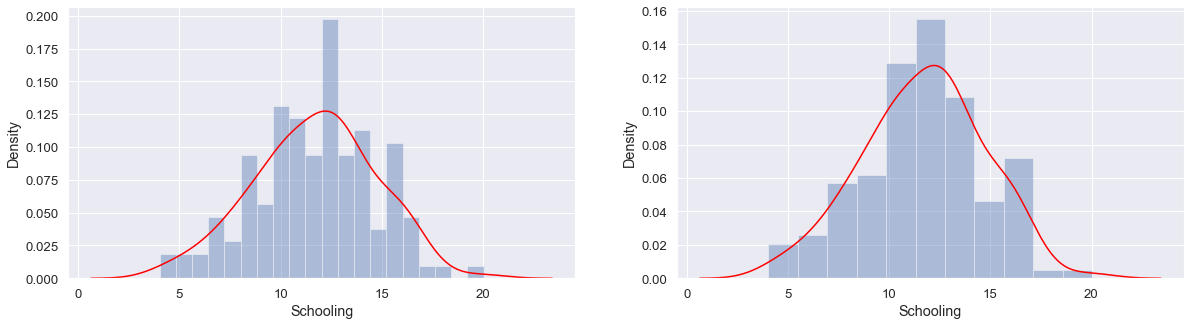

In [724]:
# seaborn version of KDF for Schooling

plt.rcParams["figure.figsize"] = (20,5) #makes the default size larger. 
#Everything after the comma is optional. 
fig, ax = plt.subplots(1,2)
sns.distplot(dfLE["Schooling"], kde_kws={"color":"red", "label":"KDE"}, hist_kws={"label":"Data"}, ax=ax[1])
sns.distplot(dfLE["Schooling"], bins=20, kde_kws={"color":"red", "label":"KDE"}, hist_kws={"label":"Data"}, ax=ax[0])
plt.show()

In [725]:
# the distribution looks quite normal as its a near bell shape curve, 
# Therefore we will consider its as normal Distribution.

In [726]:
#s_cdf = thinkstats2.Cdf(dfLE["Schooling"])
#thinkplot.Cdf(s_cdf)
#sns.ecdfplot(data=dfLE["Schooling"])
#sns.set(style="darkgrid", font_scale=1.2)

<AxesSubplot:ylabel='Proportion'>

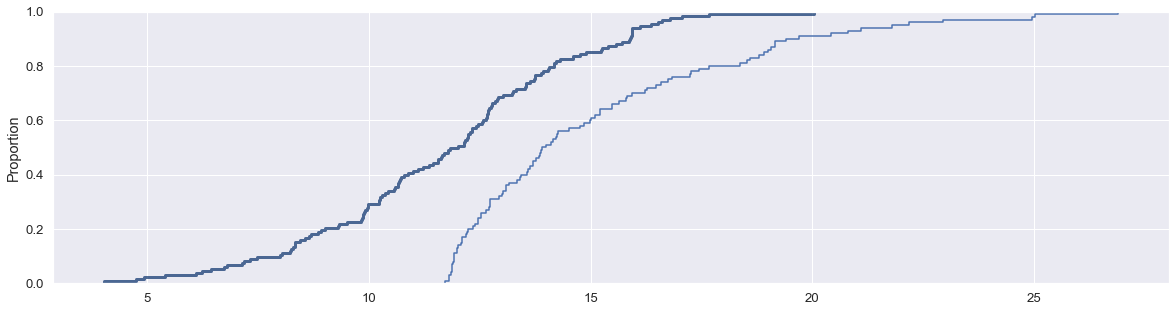

In [727]:
#Empirical and analytical plotted together

s_cdf = thinkstats2.Cdf(dfLE["Schooling"])
thinkplot.Cdf(s_cdf)
sns.ecdfplot(data=scipy.stats.expon.rvs(size=100, scale=np.std(dfLE["Schooling"]), loc=np.mean(dfLE["Schooling"])))

#sep28-1:56Hrs,2.00Hrs

In [728]:
dfs.describe()

count    133.000000
mean      11.691823
std        3.006460
min        4.018750
25%        9.868750
50%       12.000000
75%       13.725000
max       20.037500
Name: Schooling, dtype: float64

In [729]:
def bigGraph(df_in, columnName):
    data = pd.Series(df_in[columnName])
    hist = thinkstats2.Hist(round(data))
    pmf = thinkstats2.Pmf(data)
    cdf = thinkstats2.Cdf(data)
    pdf = thinkstats2.EstimatedPdf(data) #See more below

    thinkplot.PrePlot(6, rows =2, cols=3)
    thinkplot.SubPlot(1, title="Hist")
    thinkplot.Hist(hist)
    thinkplot.SubPlot(2, title="PMF")
    thinkplot.Pmf(pmf)
    thinkplot.SubPlot(3, title="CDF")
    thinkplot.Cdf(cdf)
    thinkplot.SubPlot(4, title="Prob Plot")
    thinkstats2.NormalProbabilityPlot(data)
    thinkplot.SubPlot(5, title="Log PP")
    thinkstats2.NormalProbabilityPlot(np.log(data))
    thinkplot.SubPlot(6, title="PDF")
    thinkplot.Pdf(pdf)
    
    thinkplot.Config()
    return

In [730]:
#bigGraph(dfs,"Schooling")

In [731]:
dfs.describe()

count    133.000000
mean      11.691823
std        3.006460
min        4.018750
25%        9.868750
50%       12.000000
75%       13.725000
max       20.037500
Name: Schooling, dtype: float64

In [732]:
#plt.title('schooling')
#sns.lineplot(data=dfs,x="GPD_per_Capita",y="Schooling")
#plt.yscale('log')
#plt.legend()

### Part 3: Create another analytical distribution for GDP per Capita (20pts)

<ul>
<li>5 points are for choosing an appropriate distribution. Please state it clearly somewhere.
<li>10 points are for creating and visualizing it alongside the emperical. You have free reign on how. 
<li>5 points are for using the analytical distribution to evaluate the quality of your GDP per capita metric - does it appear accurate? Why or why not?
<li>If you've judged GDP per cap to be unreliable, drop it. 
</ul>

In [733]:
#GDP per capita column and removing NAN's from the GDP per Capita Data
df_p=dfLE["GDP_per_Capita"]
df_p=df_p[~np.isnan(df_p)]
df_p.head()

0      34.0
1    3042.0
2     132.0
3     195.0
5     348.0
Name: GDP_per_Capita, dtype: float64

In [734]:
# making objects for graph

hist2 = thinkstats2.Hist(df_p)
pmf2 = thinkstats2.Pmf(df_p)
cdf2 = thinkstats2.Cdf(df_p)

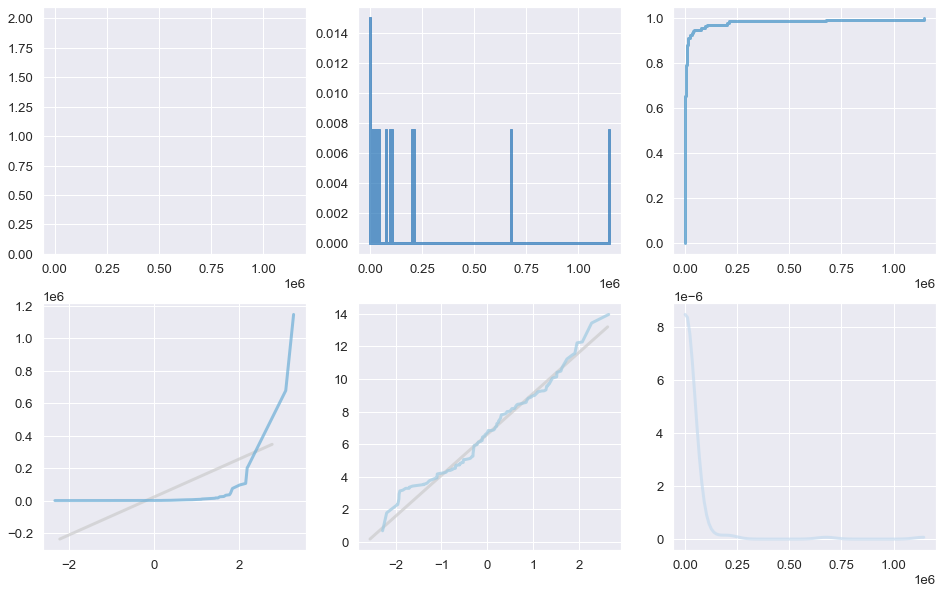

In [735]:
#Print all distributions
#Create graphs
thinkplot.PrePlot(6, rows =2, cols=3)
thinkplot.Hist(hist2)
thinkplot.SubPlot(2)
thinkplot.Pmf(pmf2)
thinkplot.SubPlot(3)
thinkplot.Cdf(cdf2)
thinkplot.SubPlot(4)
thinkstats2.NormalProbabilityPlot(df_p)
thinkplot.SubPlot(5)
thinkstats2.NormalProbabilityPlot(np.log(df_p))
thinkplot.SubPlot(6)
pdf = thinkstats2.EstimatedPdf(df_p) #See more below
thinkplot.Pdf(pdf)
thinkplot.Config()

<AxesSubplot:xlabel='GDP_per_Capita', ylabel='Count'>

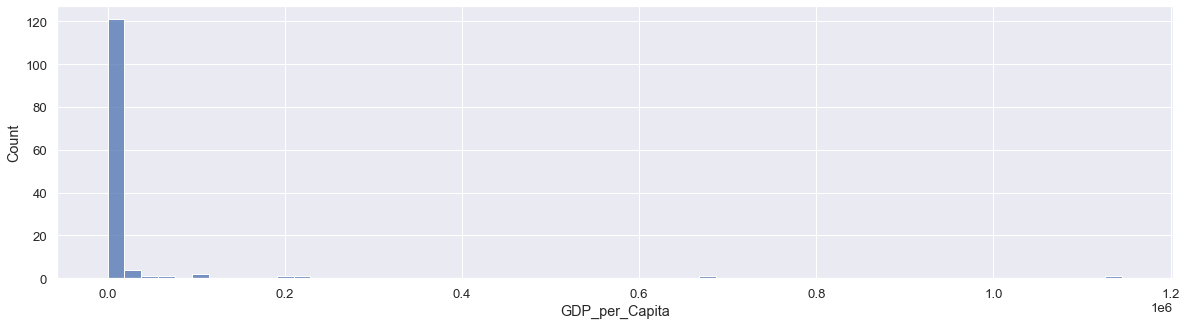

In [736]:
#Graph
sns.histplot(df_p, bins=60)



c:\Users\shikh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='GDP_per_Capita', ylabel='Density'>

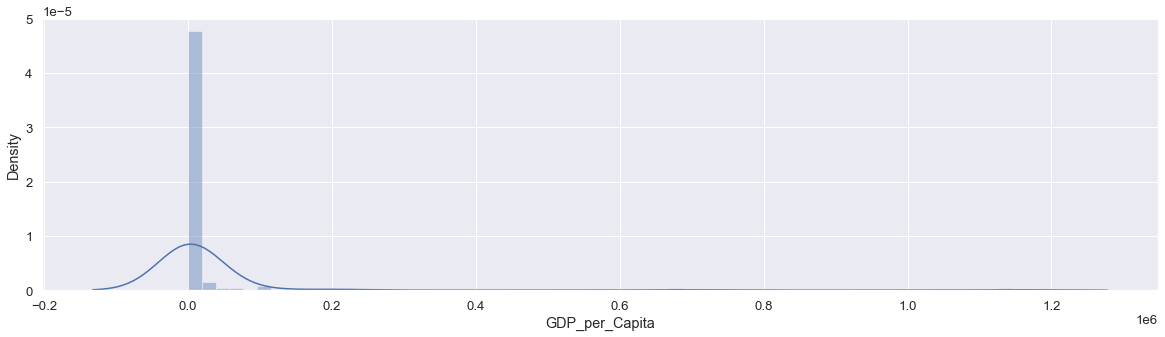

In [737]:
sns.distplot(df_p, bins=60)

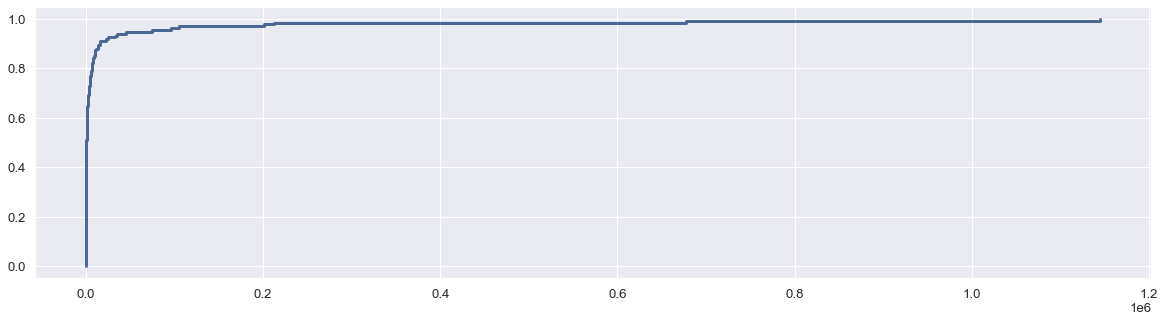

In [738]:
#Make an emperical CDF for "GDP PER CAPITA"
cdf_ap = thinkstats2.Cdf(df_p)
thinkplot.Cdf(cdf_ap)
sns.set(style="darkgrid", font_scale=1.2)

In [739]:
df_p.describe()

count    1.330000e+02
mean     2.209585e+04
std      1.175431e+05
min      2.000000e+00
25%      1.100000e+02
50%      6.280000e+02
75%      4.676000e+03
max      1.145174e+06
Name: GDP_per_Capita, dtype: float64

In [740]:
#Make analytical dist.
mu2 = df_p.mean()
sigma2 = df_p.std()
mu2, sigma2



(22095.84962406015, 117543.1064623126)

In [741]:
#Make an analytical distribution
dfs_pa = scipy.stats.norm(mu2,sigma2)

c:\Users\shikh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\shikh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


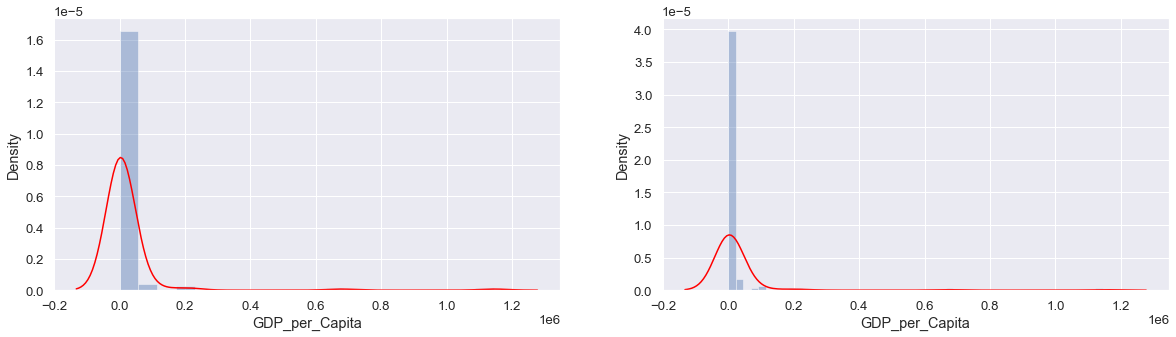

In [742]:
#anlytical distribuiton:
#KDF for "GDP per capita"
plt.rcParams["figure.figsize"] = (20,5) 
fig, ax = plt.subplots(1,2)
sns.distplot(dfLE["GDP_per_Capita"], kde_kws={"color":"red", "label":"KDE"}, hist_kws={"label":"Data"}, ax=ax[1])
sns.distplot(dfLE["GDP_per_Capita"], bins=20, kde_kws={"color":"red", "label":"KDE"}, hist_kws={"label":"Data"}, ax=ax[0])
plt.show()

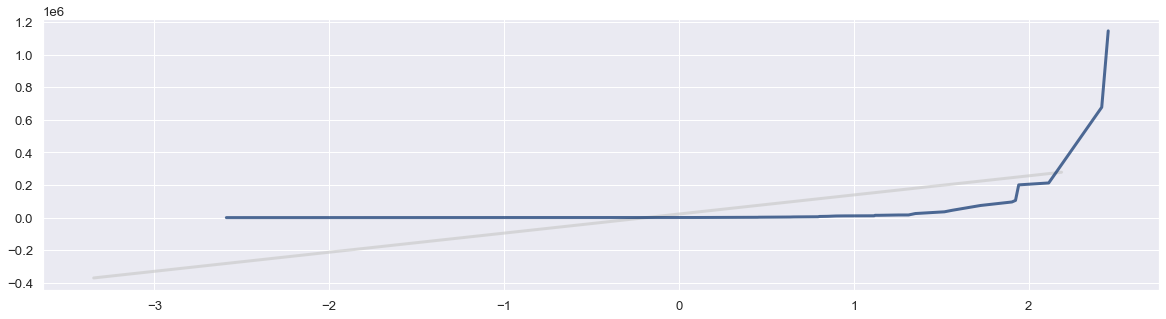

In [743]:
thinkstats2.NormalProbabilityPlot(dfLE["GDP_per_Capita"])
## jump in graph at the end shows exponential growth- generally exponential numbers are plotted against time.

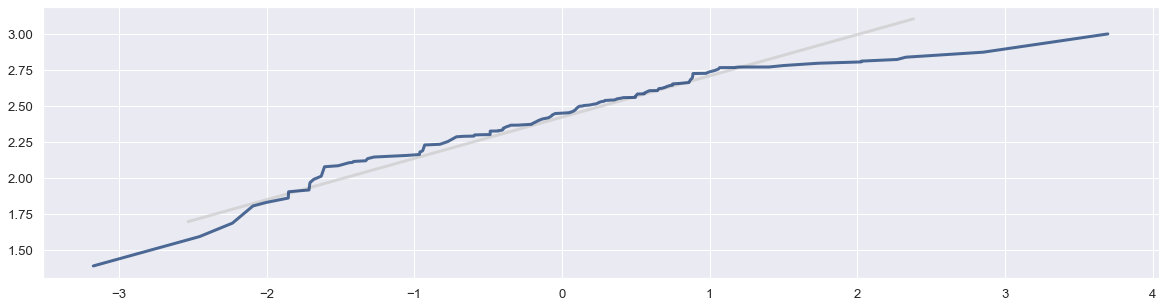

In [744]:
# analytical distribution
thinkstats2.NormalProbabilityPlot(np.log(dfs))

<AxesSubplot:ylabel='Proportion'>

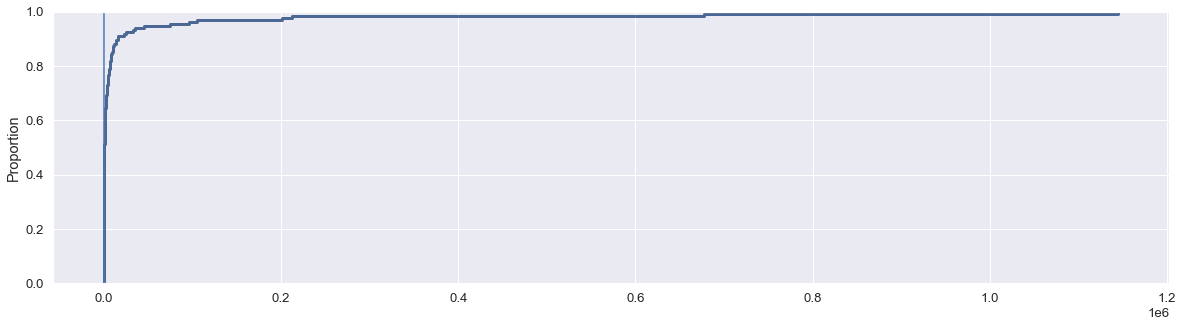

In [745]:
#Empirical and analytical plotted together for " GDP PER CAPITA"

gp_cdf = thinkstats2.Cdf(dfLE["GDP_per_Capita"])
thinkplot.Cdf(gp_cdf)
sns.ecdfplot(data=scipy.stats.expon.rvs(size=100, scale=np.std(dfLE["Schooling"]), loc=np.mean(dfLE["Schooling"])))

### Part 4: Visually identify correlations. Separate developed and not developed countries is some way. (15pts)

<ul>
<li>5 points are for effectively and clearly showing the visualizations used to evaluate correlations.
<li>10 points are for, in the process of visualizing, remove outliers that confound correlations. List outlier "filters" you used and justify why - was the data an error, a real value that is just way out of line, or somethingn else? Remember, you're trying to find things that have correlations with each other. Looking at a correlation between home size and income may not benefit from Jeff Bezos being included. It may be helpful to look at the results and revise. 
</ul>

In [746]:
#dfLE

In [793]:
from cmath import nan


df_dev=dfLE[dfLE["isDeveloped"]==1.0]
df_ndev=dfLE[dfLE["isDeveloped"]==0.0]


In [749]:
df_dev

,Country,isDeveloped,Lifeexpectancy,AdultMortality,infantdeaths,Alcohol,HepatitisB,Measles,BMI,under-fivedeaths,Polio,Diphtheria,GDP,Population,Schooling,GDP_per_Capita
7,Australia,1.0,81.81250,63.1875,1.0000,10.155333,93.400000,103.9375,55.86250,1.3750,86.7500,86.8750,34637.565047,4.587010e+06,20.03750,7551.0
8,Austria,1.0,81.48125,65.7500,0.0000,12.236000,81.062500,77.2500,48.28750,0.0000,86.0000,86.7500,33827.476309,6.474880e+06,15.38750,5224.0
15,Belgium,1.0,80.68125,70.1875,0.2500,11.042667,74.500000,81.5625,50.89375,1.0000,97.7500,97.3125,16915.306000,2.884043e+06,16.78750,5865.0
24,Bulgaria,1.0,72.85000,125.5000,0.9375,10.865333,94.500000,1530.3125,54.50000,1.0000,94.2500,94.0000,4938.981821,5.290924e+06,13.72500,933.0
40,Croatia,1.0,76.11875,89.0000,0.0000,12.448000,96.222222,23.6875,52.35625,0.0000,95.5000,95.3750,9056.784719,1.159772e+06,13.88750,7809.0
42,Cyprus,1.0,79.67500,54.1250,0.0000,10.260667,92.625000,1.9375,53.16250,0.0000,98.0000,98.0000,13898.885501,3.902744e+05,13.51875,35613.0
64,Germany,1.0,81.17500,71.2500,2.5000,11.628667,77.437500,1497.1875,51.99375,3.2500,94.8125,89.8750,24337.749100,3.875735e+07,16.60000,628.0
80,Ireland,1.0,80.15000,72.4375,0.0000,12.654000,86.833333,174.5000,53.68750,0.0000,86.1250,86.1250,33835.272005,3.599795e+06,17.65625,9399.0
82,Italy,1.0,82.18750,54.1875,2.0000,8.266667,95.500000,1961.3750,56.15000,2.3125,96.1250,94.7500,21234.782371,2.764379e+07,15.93125,768.0
92,Latvia,1.0,73.73125,161.8125,0.0000,8.864000,88.937500,3.3125,51.30625,0.0000,95.0625,95.0000,7951.824897,1.174563e+06,15.56875,6770.0


In [750]:
#df_dev=df_dev[~nan[df_dev]]

In [751]:
#oulier
df_dev=df_dev[df_dev["infantdeaths"]>0.10]
df_ndev=df_ndev[df_ndev["infantdeaths"]>0.10]


In [752]:
df_dev=df_dev[["Country","AdultMortality","GDP","infantdeaths","Schooling","Lifeexpectancy","under-fivedeaths","Population","GDP_per_Capita"]]
df_ndev=df_ndev[["Country","AdultMortality","GDP","infantdeaths","Schooling","Lifeexpectancy","under-fivedeaths","Population","GDP_per_Capita"]]

In [753]:
df_dev=df_dev[df_dev["infantdeaths"]>0.10]
df_ndev=df_ndev[df_ndev["infantdeaths"]>0.10]

In [754]:
#Cut down data to only numeric values, and fliter out some outliers. 
#df2 = df[["age", "gender", "height", "weight", "ap_lo", "ap_hi"]]
#df2 = df2[(df2["height"]>110) & (df2["height"] < 200)]

In [755]:
df_dev

,Country,AdultMortality,GDP,infantdeaths,Schooling,Lifeexpectancy,under-fivedeaths,Population,GDP_per_Capita
7,Australia,63.1875,34637.565047,1.0000,20.03750,81.81250,1.3750,4.587010e+06,7551.0
15,Belgium,70.1875,16915.306000,0.2500,16.78750,80.68125,1.0000,2.884043e+06,5865.0
24,Bulgaria,125.5000,4938.981821,0.9375,13.72500,72.85000,1.0000,5.290924e+06,933.0
64,Germany,71.2500,24337.749100,2.5000,16.60000,81.17500,3.2500,3.875735e+07,628.0
82,Italy,54.1875,21234.782371,2.0000,15.93125,82.18750,2.3125,2.764379e+07,768.0
118,Netherlands,61.6250,34964.719797,1.0000,17.05625,81.13125,1.0000,9.775704e+06,3577.0
133,Poland,107.5625,6792.563600,2.2500,15.25000,75.65000,2.6875,1.605325e+07,423.0
134,Portugal,58.8750,11598.625531,0.1875,15.93750,79.99375,0.3750,1.032225e+06,11237.0
138,Romania,156.0625,4258.940054,2.8125,13.92500,74.05000,3.2500,9.206346e+06,463.0
159,Spain,63.6250,17093.459737,1.6250,16.35625,82.06875,1.8750,2.654285e+07,644.0


In [756]:
df_ndev

,Country,AdultMortality,GDP,infantdeaths,Schooling,Lifeexpectancy,under-fivedeaths,Population,GDP_per_Capita
0,Afghanistan,269.0625,340.015425,78.2500,8.21250,58.19375,107.5625,9.972260e+06,34.0
1,Albania,45.0625,2119.726679,0.6875,12.13750,75.15625,0.9375,6.969116e+05,3042.0
2,Algeria,108.1875,2847.853392,20.3125,12.71250,73.61875,23.5000,2.164983e+07,132.0
3,Angola,328.5625,1975.143045,83.7500,8.04375,49.01875,132.6250,1.014710e+07,195.0
5,Argentina,106.0000,6998.575103,10.1250,16.50625,75.15625,11.3750,2.012120e+07,348.0
...,...,...,...,...,...,...,...,...,...
178,Ukraine,205.7500,1577.293329,5.0625,14.60625,69.93750,5.9375,1.000493e+07,158.0
183,Uruguay,119.9375,7192.584875,0.5625,15.23125,76.07500,0.7500,2.396771e+06,3001.0
184,Uzbekistan,184.8125,651.092359,21.9375,11.64375,68.03125,25.6875,9.036317e+05,721.0
189,Zambia,354.3125,811.811841,33.4375,11.21250,53.90625,52.3750,6.260246e+06,130.0


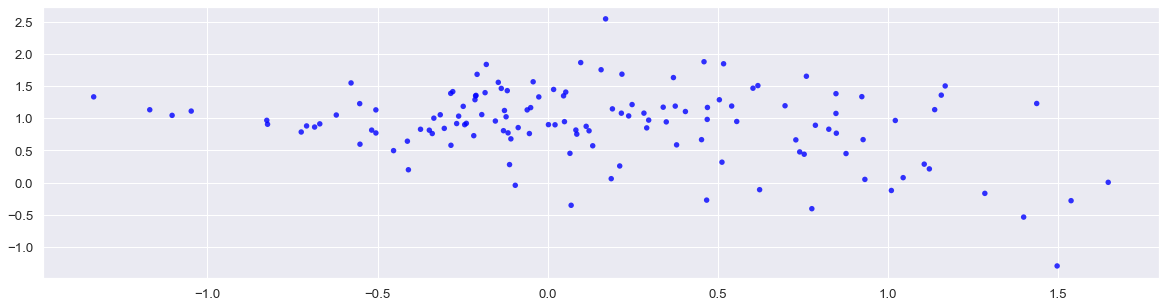

In [757]:
thinkplot.Scatter(thinkstats2.Jitter(dfLE["isDeveloped"]==1),thinkstats2.Jitter(dfLE["isDeveloped"]==0),alpha=.8)
#thinkplot.Scatter(thinkstats2.Jitter(dfLE["isDeveloped"]==0.0))

In [758]:
#thinkplot.Scatter(thinkstats2.Jitter(df_dev),thinkstats2.Jitter(df_ndev),alpha=.3)

In [759]:
#Everytime X increases, Y decreases by a proportionate amount.  negatively correlated. 
#EVERYTIME X INCREASES, Y DECREASES BY A PROPORTIONATE AMOUNT. THEREFORE THE DEVELOPED COUNTIRES 
# AND NOT DEVELOPED COUNTRIES ARE NEGATIVELY CORRELATED.

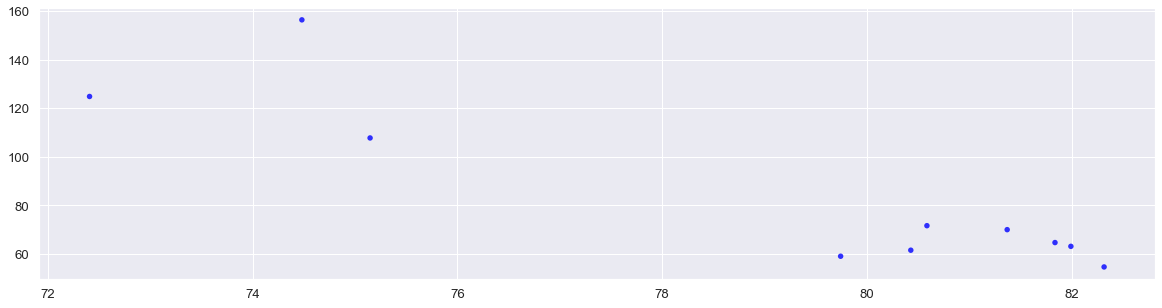

In [760]:
#CORRELATION BETWEEN LIFEEXPECTANCY AND ADULMORTALITY ARE LOW CORELATED IN DEVELEOPED COUNTIRES

thinkplot.Scatter(thinkstats2.Jitter(df_dev["Lifeexpectancy"]),thinkstats2.Jitter(df_dev["AdultMortality"]),alpha=.8)

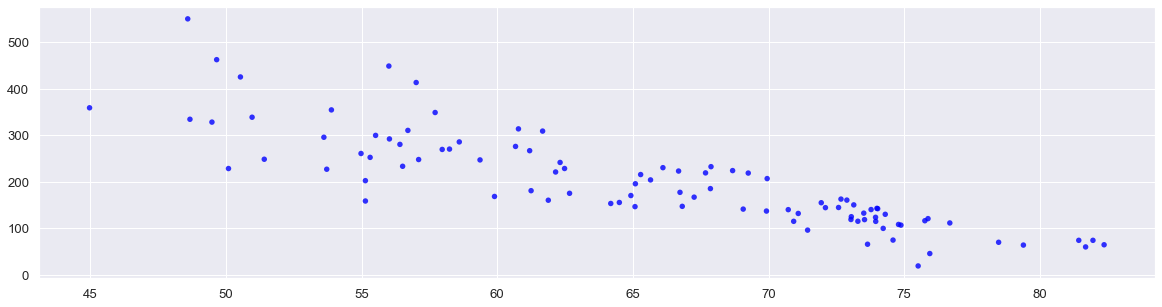

In [761]:
#CORRELATION BETWEEN LIFEEXPECTANCY AND ADULMORTALITY HAVE  HIGH NEGATIVE CORELATED IN NOT DEVELEOPED COUNTIRES

thinkplot.Scatter(thinkstats2.Jitter(df_ndev["Lifeexpectancy"]),thinkstats2.Jitter(df_ndev["AdultMortality"]),alpha=.8)


In [762]:
# GDP_per_capita is directly related to high infant deaths as it is clearly visible from the above 
# filetering the data for infant death 1 or more than 1 for developed countries where per capita income is more than 200 
# units the survival rate is high and infant death 1 or more for not developed countries where  the per capita income is 
# less than  200 units survival rate is. now

In [763]:
#thinkplot.Scatter(thinkstats2.Jitter(df_ndev["GDP"]),thinkstats2.Jitter(df_ndev["Polio"]),alpha=.8)

In [764]:
#thinkplot.Scatter(thinkstats2.Jitter(df_dev["GDP"]),thinkstats2.Jitter(df_dev["Polio"]),alpha=.8)

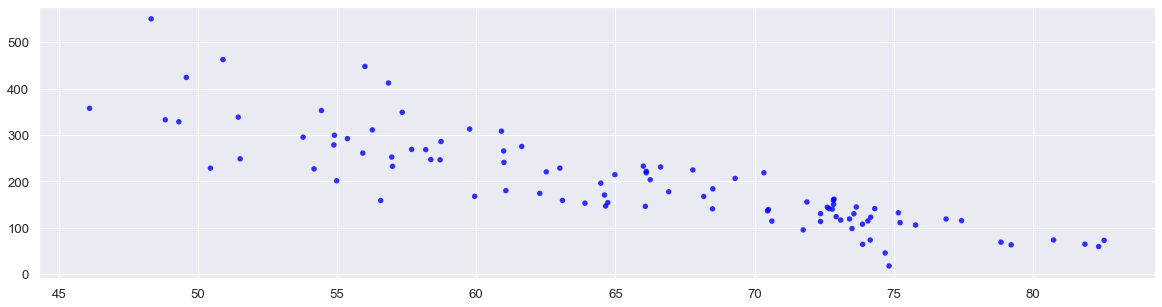

In [765]:
thinkplot.Scatter(thinkstats2.Jitter(df_ndev["Lifeexpectancy"]),thinkstats2.Jitter(df_ndev["AdultMortality"]),alpha=.8)

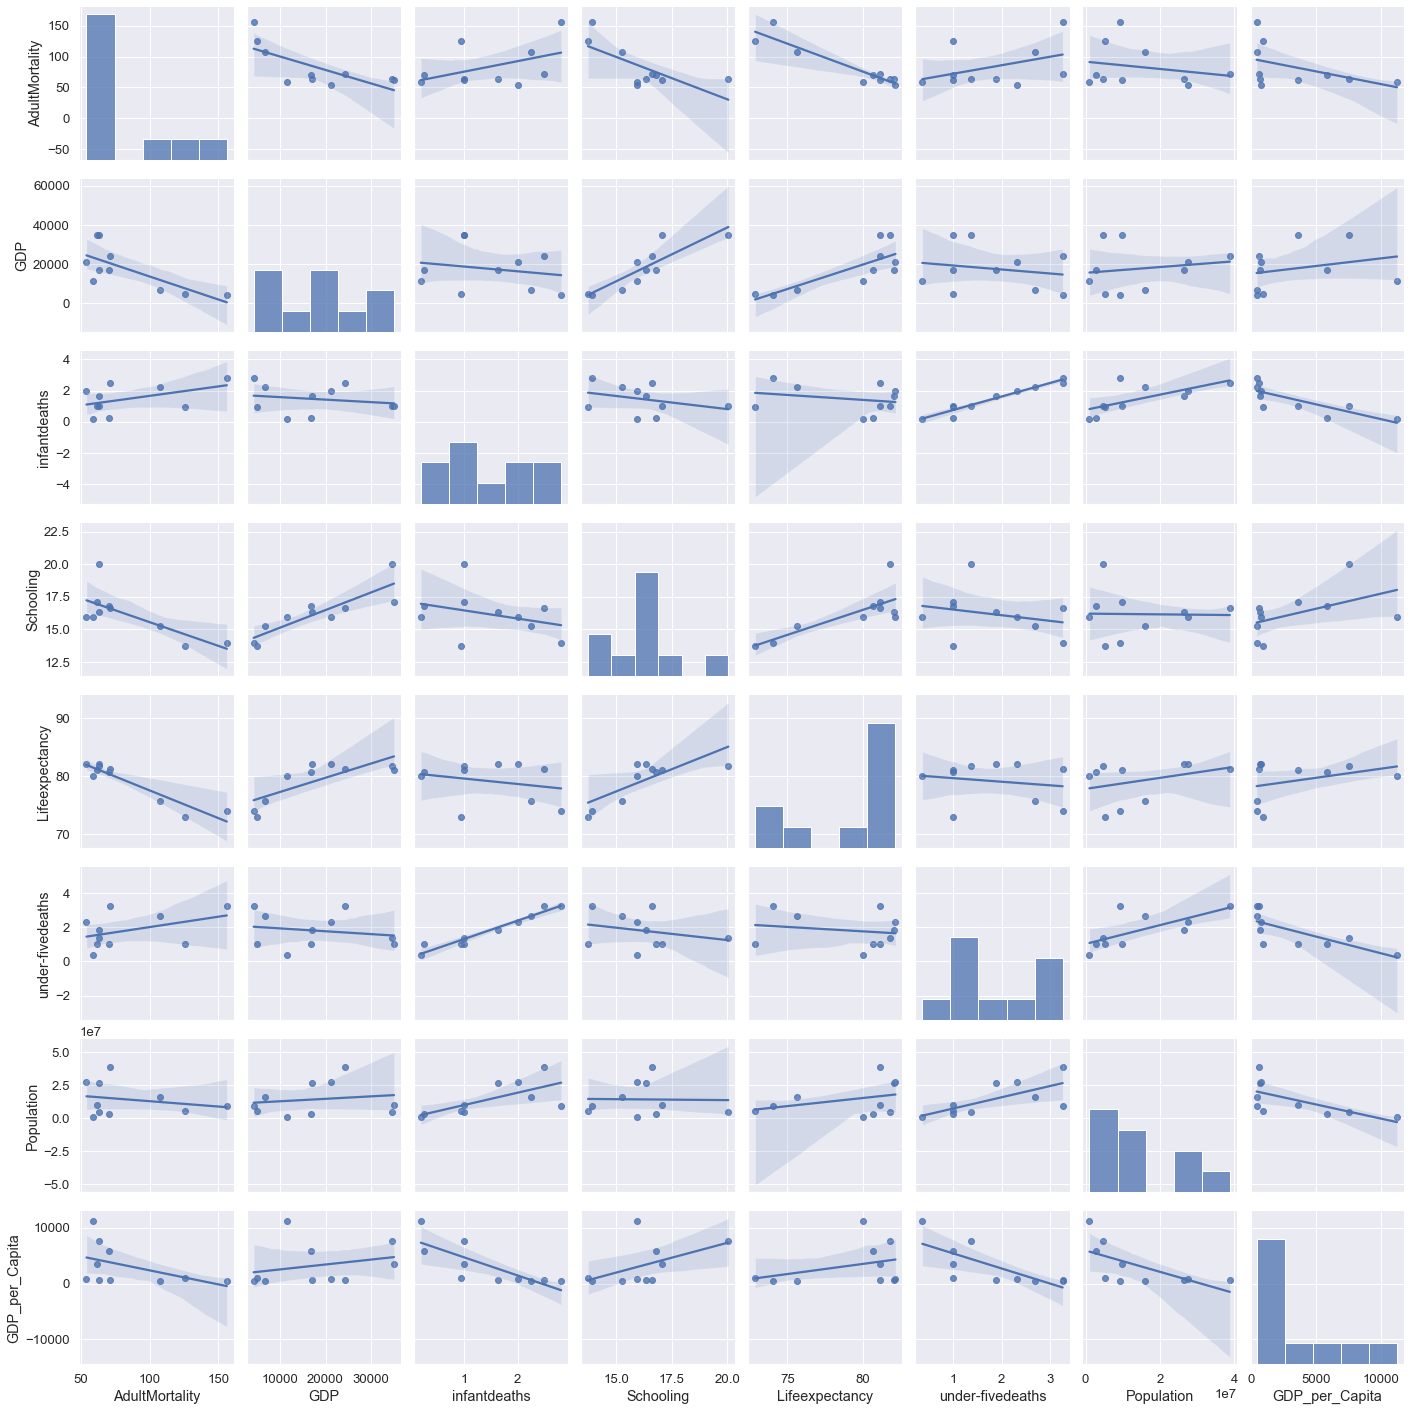

In [766]:
sns.pairplot(data=df_dev, kind="reg")
plt.show()

In [767]:
#Visualize correlations. 
#a=df_dev.values.tolist()
#b=df_ndev.values.tolist()
#thinkstats2.Corr(a,b), thinkstats2.SpearmanCorr(a,b)


In [768]:
#plt.rcParams["figure.figsize"] = (20,10)
#thinkplot.Scatter(df_dev, df_ndev)
#thinkplot.Show(xlabel="Height", ylabel="Weight", axis=[120,220,20,160])



### Part 5: Calculate correlations (25pts)

<ul>
<li>5 points are for identifying and calculating 3 strongest correlations with life expectancy for each of developed and not developed. 
<li>10 points are for analyzing those correlations. Do they appear to be supported by reality? Do you have reason to beleive any are causal?
<li>10 points are for identifying 2 places where developing and developed countries have a substantially different relationship with respect to life expectancy, and theorizing why. What would be needed to confirm your thoughts?
</ul>

<b>Please put your written parts in markdown cells, with a little formatting to make them readable. 

In [769]:
#Calculate correlations and analyze. 



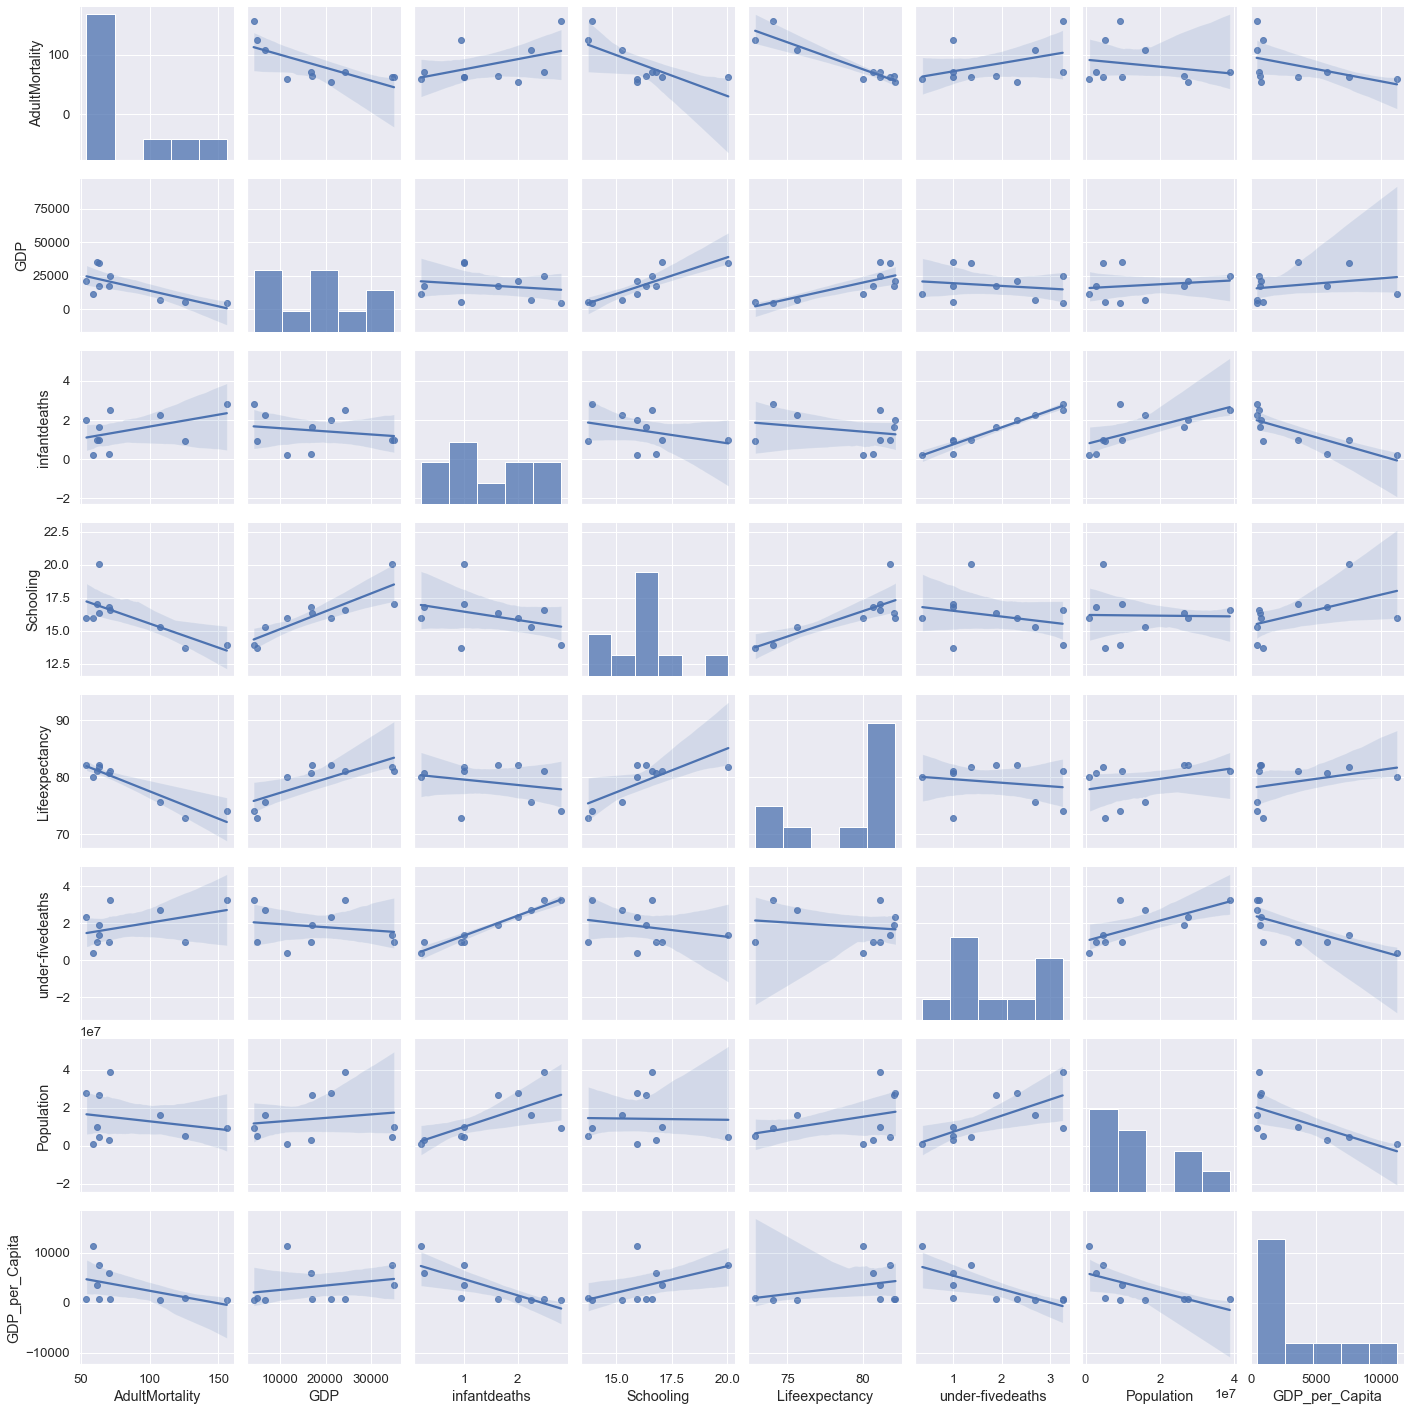

In [770]:
sns.pairplot(data=df_dev, kind="reg")
plt.show()

In [771]:
#Take the data in our dataframe, and change it into a set of correlations. 
#df_dev = dfLE.apply(pd.to_numeric, errors='coerce')
#drg2 = drg2.drop(columns=["age"])
#drg2 = drg2.corr()
#drg2.head()

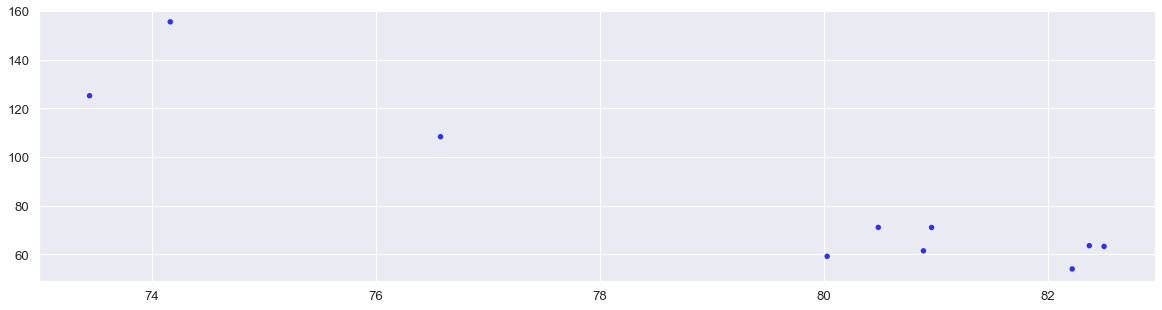

In [772]:
thinkplot.Scatter(thinkstats2.Jitter(df_dev["Lifeexpectancy"]),thinkstats2.Jitter(df_dev["AdultMortality"]),alpha=.8)

In [773]:
#Calculate some correleations
#print("Lifeexpectancy-Adult:", thinkstats2.Corr(df_dev["Lifeexpectancy"], df_dev["GDP"]), thinkstats2.SpearmanCorr(df_dev["Lifeexpectancy"],df_dev["GDP"] ))
#print("Glucose-Insulin:", thinkstats2.Corr(d["Glucose"], d["Insulin"]), thinkstats2.SpearmanCorr(d["Glucose"], d["Insulin"]))
#print("Glucose-BP:", thinkstats2.Corr(d["Glucose"], d["BloodPressure"]), thinkstats2.SpearmanCorr(d["Glucose"], d["BloodPressure"]))

In [774]:
# CALCULATION FOR CORRELATION FOR DEVELOPED COUNTRIES:
thinkstats2.Corr(df_dev["Lifeexpectancy"],df_dev["AdultMortality"])
thinkstats2.Corr(df_dev["Lifeexpectancy"],df_dev["GDP"])
thinkstats2.Corr(df_dev["Lifeexpectancy"],df_dev["Schooling"])
print("Correlation for Lifeexpectancy-AdultMortality: ",thinkstats2.Corr(df_dev["Lifeexpectancy"],df_dev["AdultMortality"]))
print("Correlation for Lifeexpectancy-GDP: ",thinkstats2.Corr(df_dev["Lifeexpectancy"],df_dev["GDP"]))
print("Correlation for Lifeexpectancy-Schooling: ",thinkstats2.SpearmanCorr(df_dev["Lifeexpectancy"],df_dev["Schooling"]))

Correlation for Lifeexpectancy-AdultMortality:  -0.9330940812150184
Correlation for Lifeexpectancy-GDP:  0.7832952147429784
Correlation for Lifeexpectancy-Schooling:  0.5878787878787879


In [775]:
thinkstats2.SpearmanCorr(df_dev["Lifeexpectancy"],df_dev["AdultMortality"])
thinkstats2.SpearmanCorr(df_dev["Lifeexpectancy"],df_dev["GDP"])
thinkstats2.SpearmanCorr(df_dev["Lifeexpectancy"],df_dev["Schooling"])

print("Correlation for Lifeexpectancy-AdultMortality: ",thinkstats2.SpearmanCorr(df_dev["Lifeexpectancy"],df_dev["AdultMortality"]))
print("Correlation for Lifeexpectancy-GDP: ",thinkstats2.SpearmanCorr(df_dev["Lifeexpectancy"],df_dev["GDP"]))
print("Correlation for Lifeexpectancy-Schooling: ",thinkstats2.SpearmanCorr(df_dev["Lifeexpectancy"],df_dev["Schooling"]))

Correlation for Lifeexpectancy-AdultMortality:  -0.696969696969697
Correlation for Lifeexpectancy-GDP:  0.7696969696969697
Correlation for Lifeexpectancy-Schooling:  0.5878787878787879


In [776]:
print(thinkstats2.SpearmanCorr(df_dev["Lifeexpectancy"],df_dev["Schooling"]))

0.5878787878787879


In [777]:
# CALCULATION FOR CORRELATION-

In [778]:
#print(thinkstats2.Corr(df_dev["Lifeexpectancy"],df_dev["AdultMortality"]))

In [779]:
#print(thinkstats2.Corr(df_dev["Lifeexpectancy"],df_dev["Schooling"]))

In [780]:
#print(thinkstats2.Corr(df_dev["Lifeexpectancy"],df_dev["GDP"]))

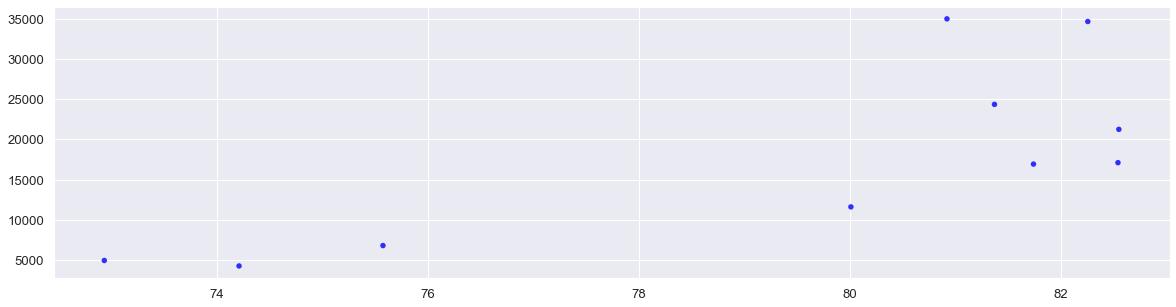

In [781]:
thinkplot.Scatter(thinkstats2.Jitter(df_dev["Lifeexpectancy"]),thinkstats2.Jitter(df_dev["GDP"]),alpha=.8)
#print(thinkstats2.Corr(df_dev["Lifeexpectancy"],df_dev["AdultMortality"]))

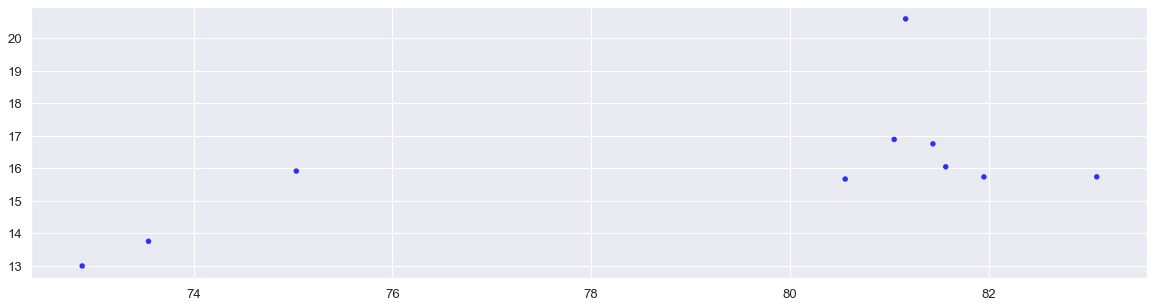

In [782]:
thinkplot.Scatter(thinkstats2.Jitter(df_dev["Lifeexpectancy"]),thinkstats2.Jitter(df_dev["Schooling"]),alpha=.8)

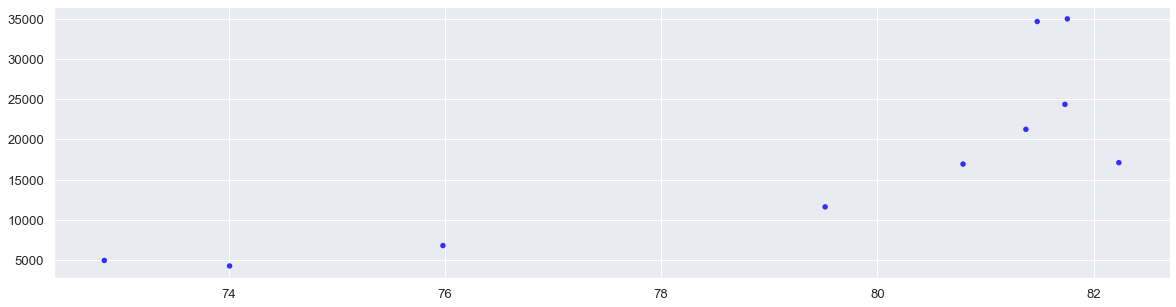

In [783]:
thinkplot.Scatter(thinkstats2.Jitter(df_dev["Lifeexpectancy"]),thinkstats2.Jitter(df_dev["GDP"]),alpha=.8)

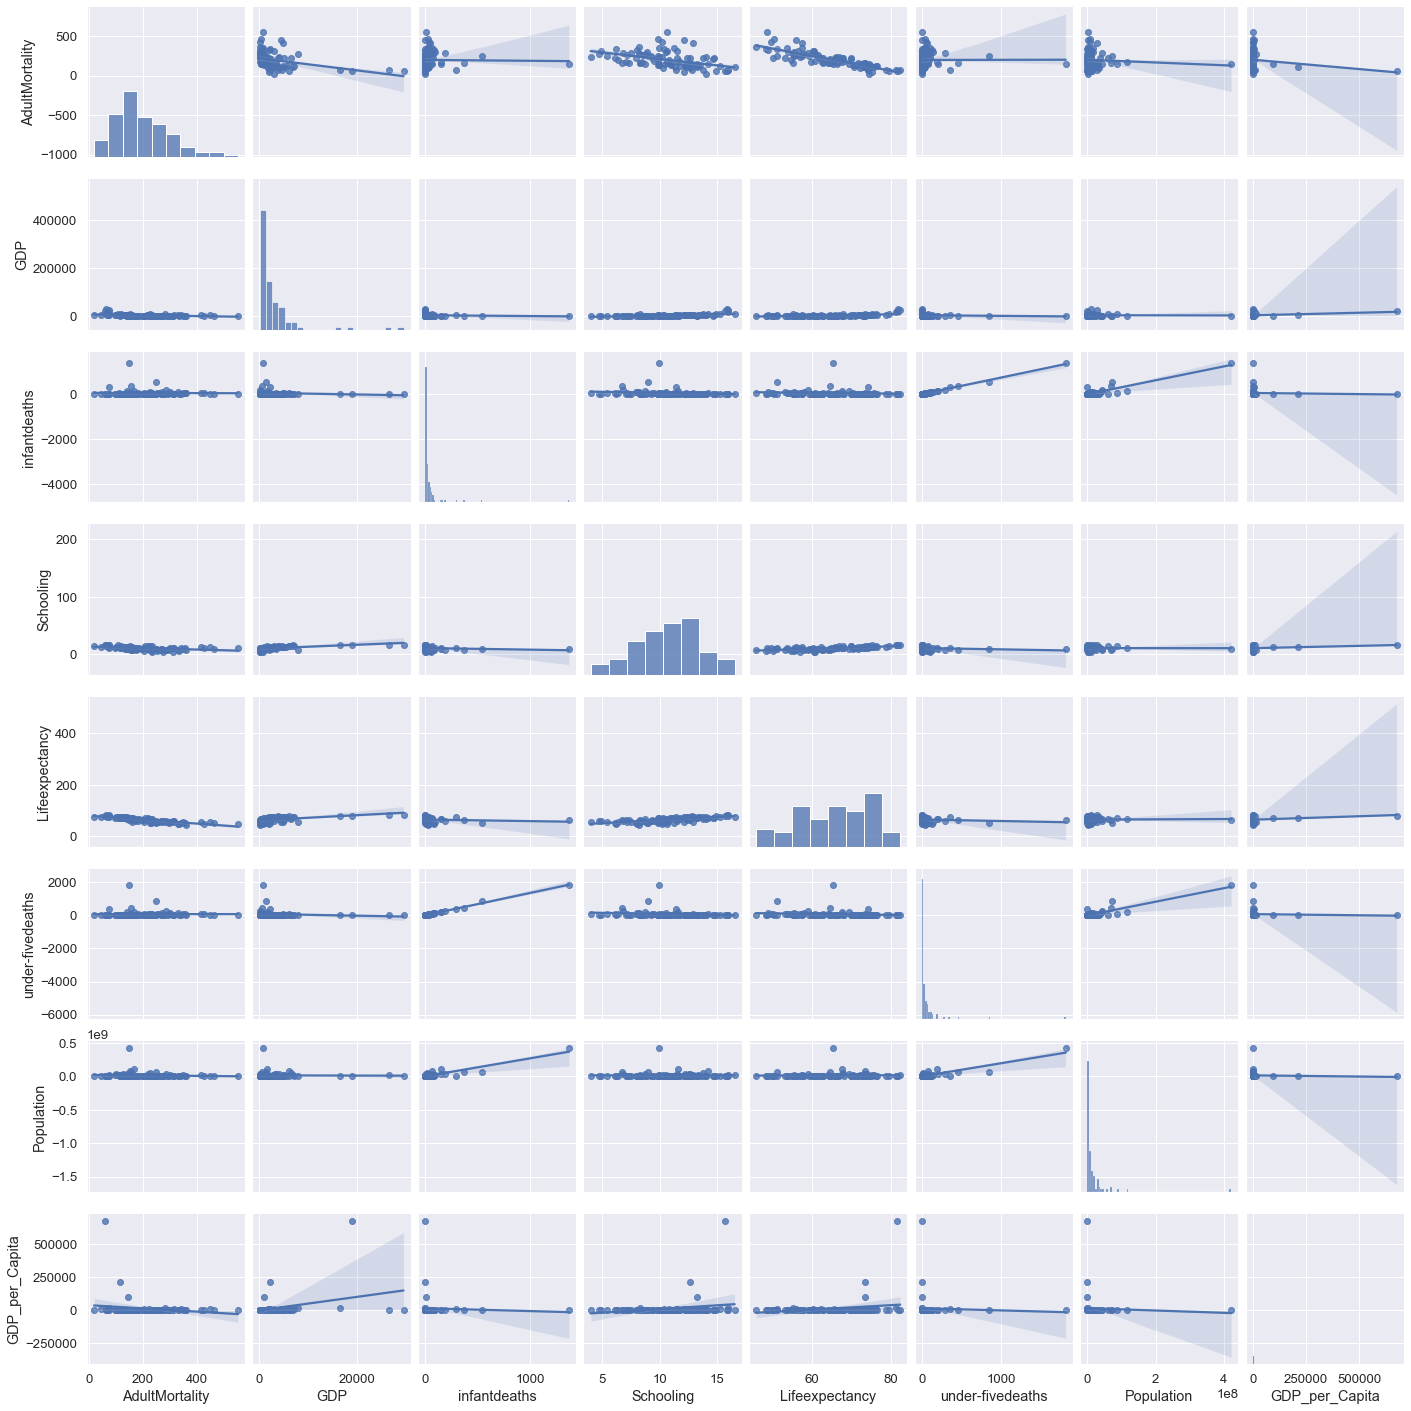

In [784]:
sns.pairplot(data=df_ndev, kind="reg")
plt.show()

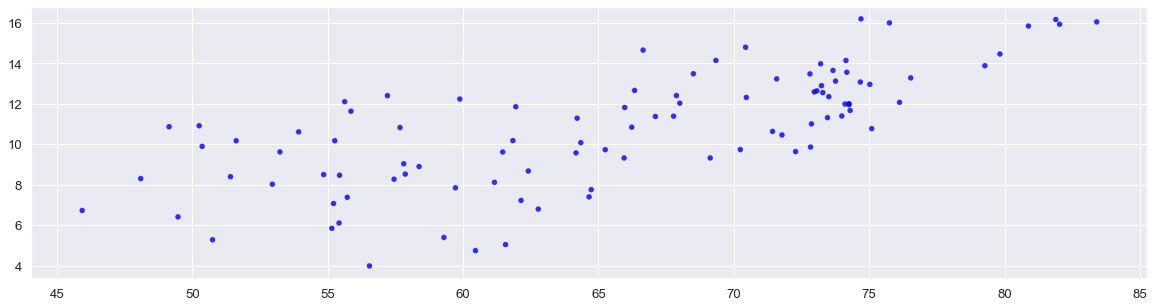

In [785]:
thinkplot.Scatter(thinkstats2.Jitter(df_ndev["Lifeexpectancy"]),thinkstats2.Jitter(df_ndev["Schooling"]),alpha=.8)

In [786]:
print(thinkstats2.Corr(df_ndev["Lifeexpectancy"],df_ndev["Schooling"]))

0.7262151340246642


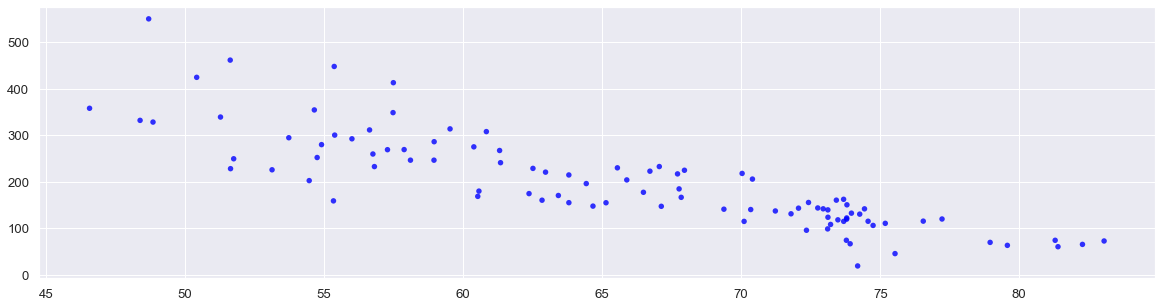

In [787]:
thinkplot.Scatter(thinkstats2.Jitter(df_ndev["Lifeexpectancy"]),thinkstats2.Jitter(df_ndev["AdultMortality"]),alpha=.8)

In [788]:

print(thinkstats2.Corr(df_ndev["Lifeexpectancy"],df_ndev["AdultMortality"]))

-0.8536279058392843


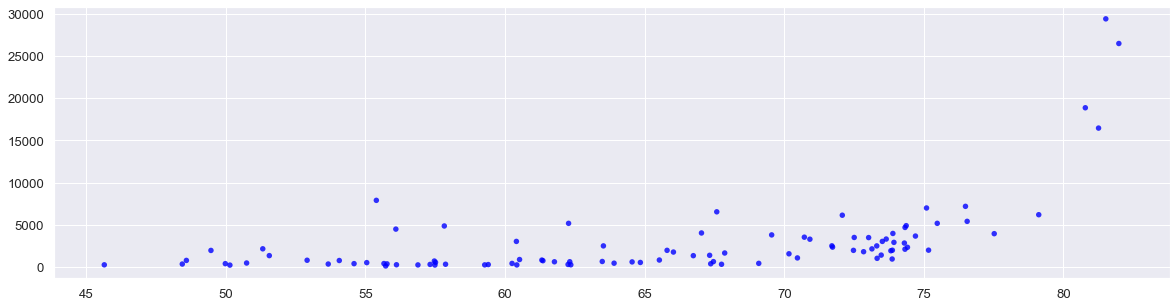

In [789]:
thinkplot.Scatter(thinkstats2.Jitter(df_ndev["Lifeexpectancy"]),thinkstats2.Jitter(df_ndev["GDP"]),alpha=.8)

In [790]:
print(thinkstats2.Corr(df_ndev["Lifeexpectancy"],df_ndev["GDP"]))

0.5225723033984773


In [791]:
# CALCULATION FOR CORRELATION FOR DEVELOPED COUNTRIES:
thinkstats2.Corr(df_ndev["Lifeexpectancy"],df_ndev["AdultMortality"])
thinkstats2.Corr(df_ndev["Lifeexpectancy"],df_ndev["GDP"])
thinkstats2.Corr(df_ndev["Lifeexpectancy"],df_ndev["Schooling"])
print("Correlation for Lifeexpectancy-AdultMortality: ",thinkstats2.Corr(df_ndev["Lifeexpectancy"],df_ndev["AdultMortality"]))
print("Correlation for Lifeexpectancy-GDP: ",thinkstats2.Corr(df_ndev["Lifeexpectancy"],df_ndev["GDP"]))
print("Correlation for Lifeexpectancy-Schooling: ",thinkstats2.SpearmanCorr(df_ndev["Lifeexpectancy"],df_ndev["Schooling"]))

Correlation for Lifeexpectancy-AdultMortality:  -0.8536279058392843
Correlation for Lifeexpectancy-GDP:  0.5225723033984773
Correlation for Lifeexpectancy-Schooling:  0.7682766465420872
